## Diagnostic: Predict whether the cancer is benign or malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/<br>
Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

#### Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

import itertools

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 

from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [2]:
cancer = load_breast_cancer()
cancer

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
data=np.c_[cancer.data, cancer.target]
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [6]:
columns=list(cancer.feature_names)
columns.append('target')
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [7]:
data=pd.DataFrame(data, columns=columns)
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [8]:
X=data.iloc[:,:-1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y=data.target
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

assert X_train.shape[0]==y_train.shape[0]
assert X_test.shape[0]==y_test.shape[0]

print('shape of: X_train: {}, y_train: {}'.format(X_train.shape, y_train.shape))

shape of: X_train: (455, 30), y_train: (455,)


#### Plotting data 
size and shape of the nucleus as predictor

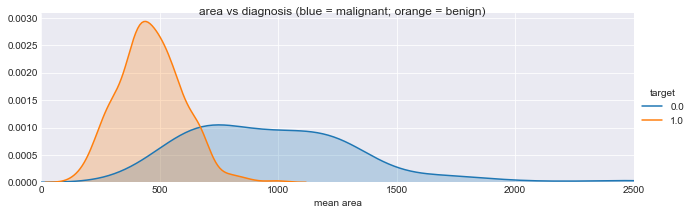

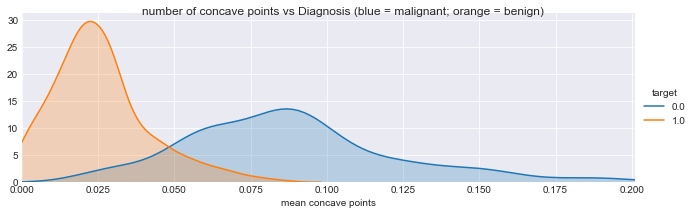

In [11]:
sns.set_style("darkgrid")
plotOne = sns.FacetGrid(data, hue="target",aspect=3)
plotOne.map(sns.kdeplot,'mean area',shade=True)
plotOne.set(xlim=(0, data['mean area'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', '')
plotOne.fig.suptitle('area vs diagnosis (blue = malignant; orange = benign)')
plt.show()

sns.set_style("darkgrid")
plotTwo = sns.FacetGrid(data, hue="target",aspect=3)
plotTwo.map(sns.kdeplot,'mean concave points',shade= True)
plotTwo.set(xlim=(0, data['mean concave points'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('mean concave points', '')
plotTwo.fig.suptitle('number of concave points vs Diagnosis (blue = malignant; orange = benign)')
plt.show()

#### PCA

In [12]:
pca=PCA(n_components=5)
X2=X
y2=y
XX=pca.fit_transform(X2,y2)
XX

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01,
        -8.71197531e+00,  3.20004861e+01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,
         1.78612832e+01, -4.33487404e+00],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00,
         4.19934010e+00, -4.66529118e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01,
        -9.77188104e+00, -6.15621283e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01,
        -2.36608814e+01,  3.56513324e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01,
         2.54724855e+00, -1.47175663e+01]])

In [13]:
X_pca=pd.DataFrame(XX)
X_pca

,0,1,2,3,4
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874
2,995.793889,39.156743,-1.709753,4.199340,-0.466529
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461
4,930.341180,189.340742,1.374801,8.499183,7.613289
5,-211.591259,-79.877446,-1.479457,-2.899295,7.620515
6,821.210900,-47.149670,-32.254999,0.303847,3.153313
7,-25.089978,-74.186015,11.790714,-7.108247,2.977096
8,-191.292834,-42.126490,-6.291312,-10.537352,1.711169
9,-238.292863,-65.386507,-3.632150,-12.609148,-8.849568


In [14]:
Xpca_train, Xpca_test, ypca_train, ypca_test=train_test_split(X_pca, y2)

In [15]:
assert ypca_train.shape[0]==Xpca_train.shape[0]
assert ypca_test.shape[0]==Xpca_test.shape[0]

Feature correlation:

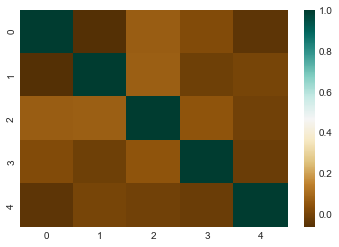

In [16]:
a=sns.heatmap(Xpca_train.corr(), cmap='BrBG')

### Decision Tree
for both sets of features

In [17]:
model1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
model1.fit(X_train, y_train)
model2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
model2.fit(Xpca_train, ypca_train)

print('Accuracy on original training set: {:.2f}%'.format(model1.score(X_train, y_train)*100))
print('Accuracy on original test set: {:.2f}%'.format(model1.score(X_test, y_test)*100))
print('Accuracy on PCA-transformed training set: {:.2f}%'.format(model2.score(Xpca_train, ypca_train)*100))
print('Accuracy on PCA-transformed test set: {:.2f}%'.format(model2.score(Xpca_test, ypca_test)*100))

Accuracy on original training set: 95.82%
Accuracy on original test set: 92.11%
Accuracy on PCA-transformed training set: 94.37%
Accuracy on PCA-transformed test set: 93.01%


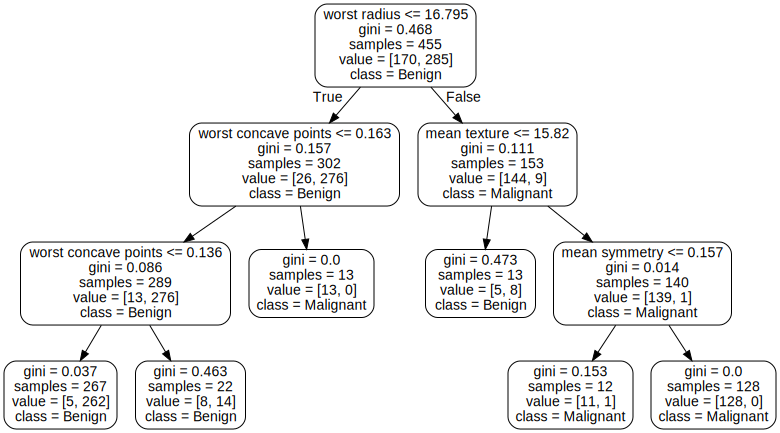

In [18]:
features1 = X.columns.values
features2 = X_pca.columns.values

def plot_decision_tree1(model,features):
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=features,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(model1,features1)

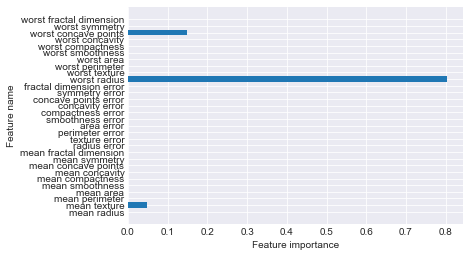

In [19]:
def plot_features(model, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), model.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_features(model1, features1)

### Random Forest

In [20]:
(X1, y1) = load_breast_cancer(return_X_y = True)

In [21]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, random_state=0)
model = RandomForestClassifier(max_features=8,random_state=0)
model.fit(X_train1,y_train1)
print('Accuracy on training data: {:.2f}'.format(model.score(X_train1,y_train1)))
print('Accuracy on testing data: {:.2f}'.format(model.score(X_test1,y_test1)))

Accuracy on training data: 1.00
Accuracy on testing data: 0.99


In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

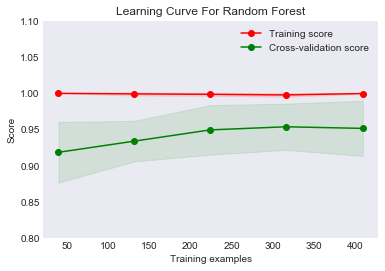

In [23]:
prediction = model.predict(X_test1)
cnf_matrix = confusion_matrix(y_test1, prediction)
plt.show()
plot_learning_curve(model, 'Learning Curve For Random Forest', X_train, y_train, (0.80,1.1), 10)
plt.show()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

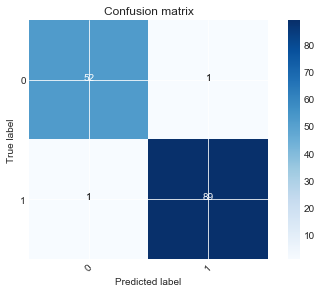

In [25]:
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()